<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<div align=center>
			<font face="IranNastaliq" size=30>
				<p></p>
به نام خدا
				<p></p>
			</font>
			<font color=#FF7500>
دانشگاه صنعتی شریف - دانشکده مهندسی کامپیوتر
            </font>
			<p></p>
			<font color=blue>
آمار و احتمال مهندسی
            </font>
			<br />
			<br />
پاییز  1401
		</div>
		<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
تمرین چهارم عملی
            	<br/>
			</font>
طراح:  محمدرضا شاپوری - هیربد بهنام 
			<br/><br/> 
موعد تحویل: 5 دی 
                <br/>
                همفکری در تمامی تمرین‌های درس توصیه می‌شود. در عین حال از شما خواسته می‌شود تا تمام پیاده‌سازی را به تنهایی و بدون مشاهده کد دیگران انجام دهید.
                <br/><br/>
                <font color=red>
                لطفا در فایل ارسالی تمام بلوک‌های کد اجرا شده و شامل نمودار‌ها و خروجی‌های لازم باشند.
     </font>
                <br/>
        </style>
	</font>
</div>

<div dir = "rtl" style="direction:rtl;line-height:250%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
             سوال اول
        </font>
        <hr/>
        <div dir = "rtl" style="direction:rtl;line-height:200%;">
	<font face="XB Zar" size=5>
       در این تمرین قصد داریم 
       ، قضیه حد مرکزی را بر روی مجموعه داده داده شده در R گام به گام شبیه‌سازی کنیم. 
</div>

<div dir = "rtl" style="direction:rtl;line-height:250%;">
	<font face="XB Zar" size=5>
        <div dir = "rtl" style="direction:rtl;line-height:200%;">
	<font face="XB Zar" size=5>
        ابتدا فایل CSV را در R وارد کنید
</div>

In [85]:
options(warn=-1)
library(ggplot2)

In [86]:
#Step 1 - Importing Data
#_______________________________________________________

#Importing the csv data 
#data<-read.csv("Clt-data.csv")
data<-read.csv(file.choose())
#Step 2 - Validate data for correctness
#______________________________________________________

#Count of Rows and columns
dim(data)

#View top 10 rows of the dataset
head(data,10)

[1] 9000    1

,Wall.Thickness
,<dbl>
1,12.35487
2,12.61742
3,12.36972
4,13.22335
5,13.15919
6,12.67549
7,12.36131
8,12.44468
9,12.62977


<div dir = "rtl" style="direction:rtl;line-height:250%;">
	<font face="XB Zar" size=5>
        <div dir = "rtl" style="direction:rtl;line-height:200%;">
	<font face="XB Zar" size=5>
    حال میانگین جمعیت را محاسبه کنید و داده ها را در نمودار رسم کنید:
</div>

[1] 12.80205

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


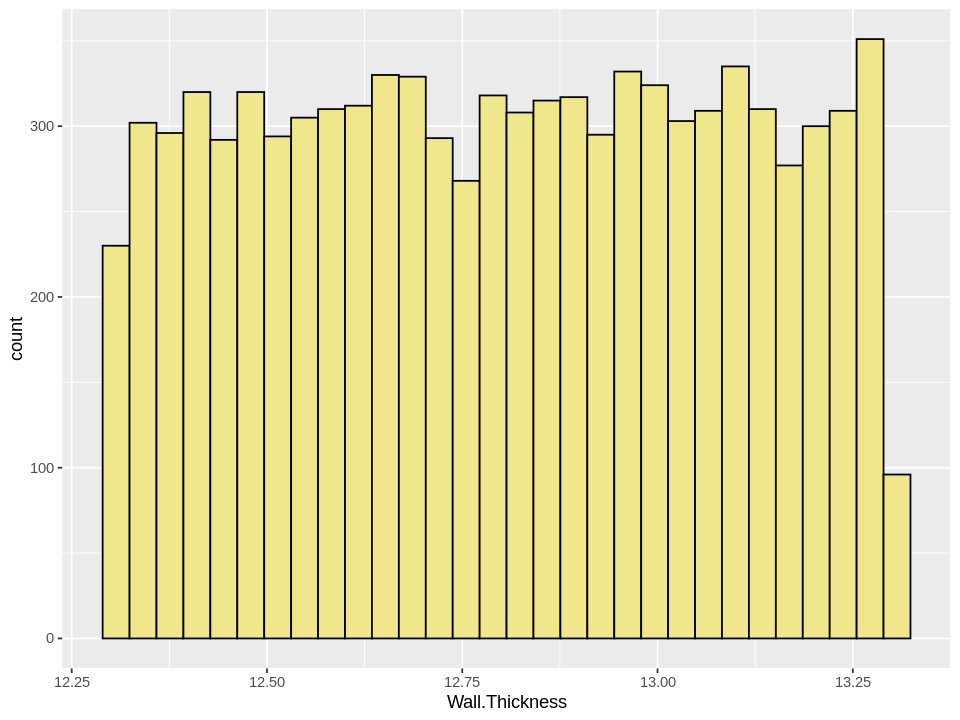

In [94]:

#Calculate the population mean
mean(data$Wall.Thickness)
#Plot all the observations in the data

s <- ggplot(data=data,aes(x=Wall.Thickness))
s + geom_histogram(col="black",fill="khaki")

<div dir = "rtl" style="direction:rtl;line-height:250%;">
	<font face="XB Zar" size=5>
        <div dir = "rtl" style="direction:rtl;line-height:200%;">
	<font face="XB Zar" size=5>
        حال  سمپل هایی (حداقل ۳ عدد) با سايز بزرگ تر (حداقل ۳۰) گرفته و  میانگین آن را  برای تعداد دفعات بالا(n=9000) محاسبه کنید و شکل نمودار را با نمودار اولیه مقایسه کنید
</div>

In [95]:
m <- mean(data$Wall.Thickness)
sig <- sd(data$Wall.Thickness)
sample_z <- function(n) {
    s <- sample(data$Wall.Thickness, n, replace = F)
    return((sum(s)-100*m)/(sig * 10))
}
?sample()
z <- replicate(10000, sample_z(100))


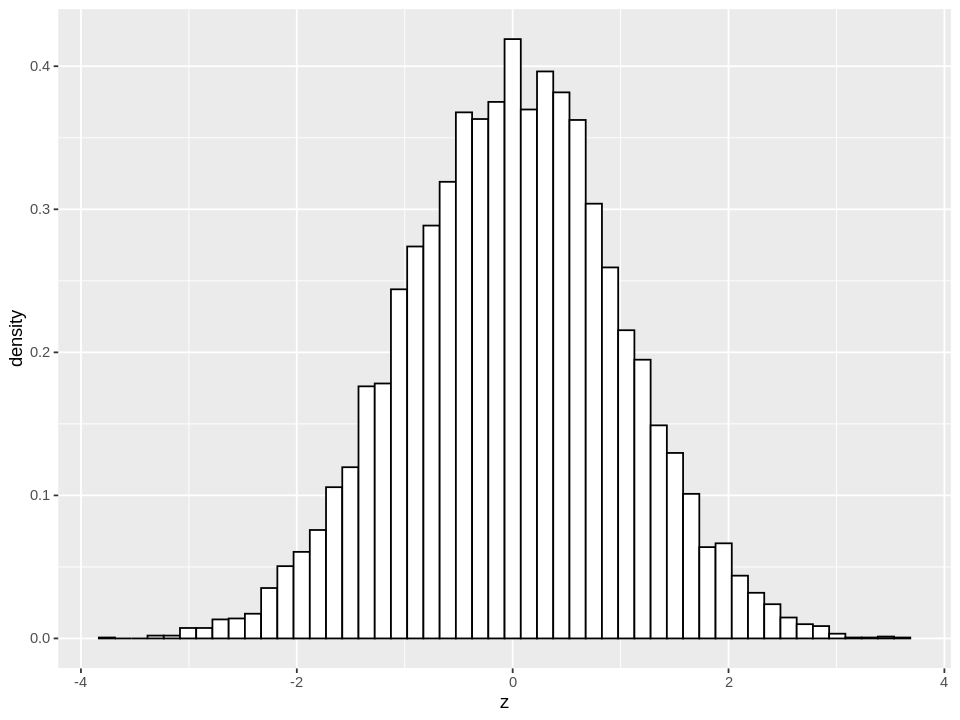

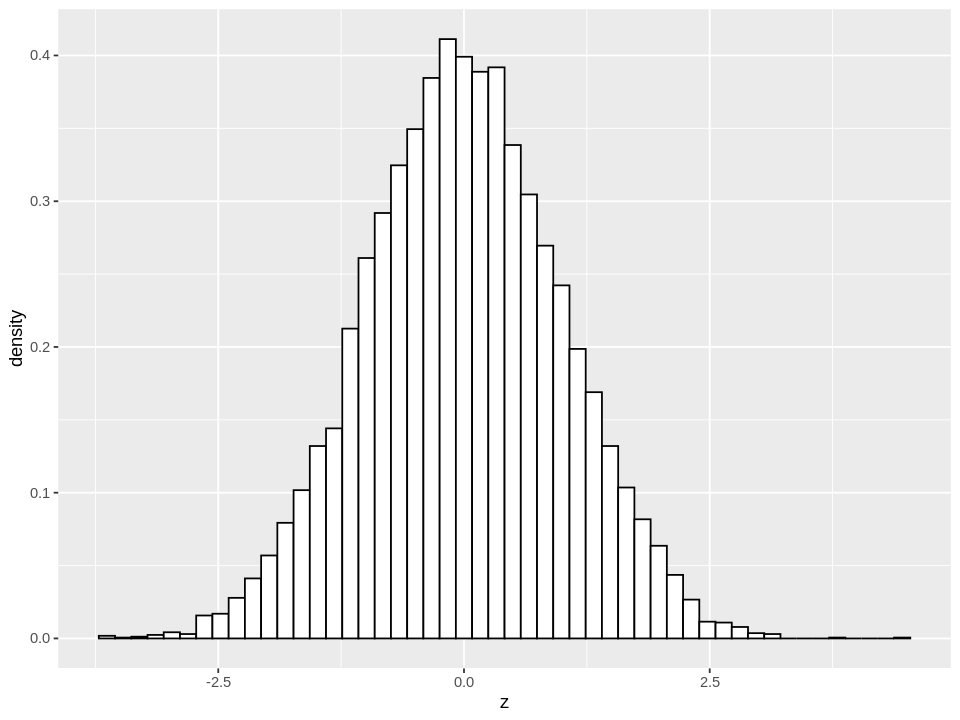

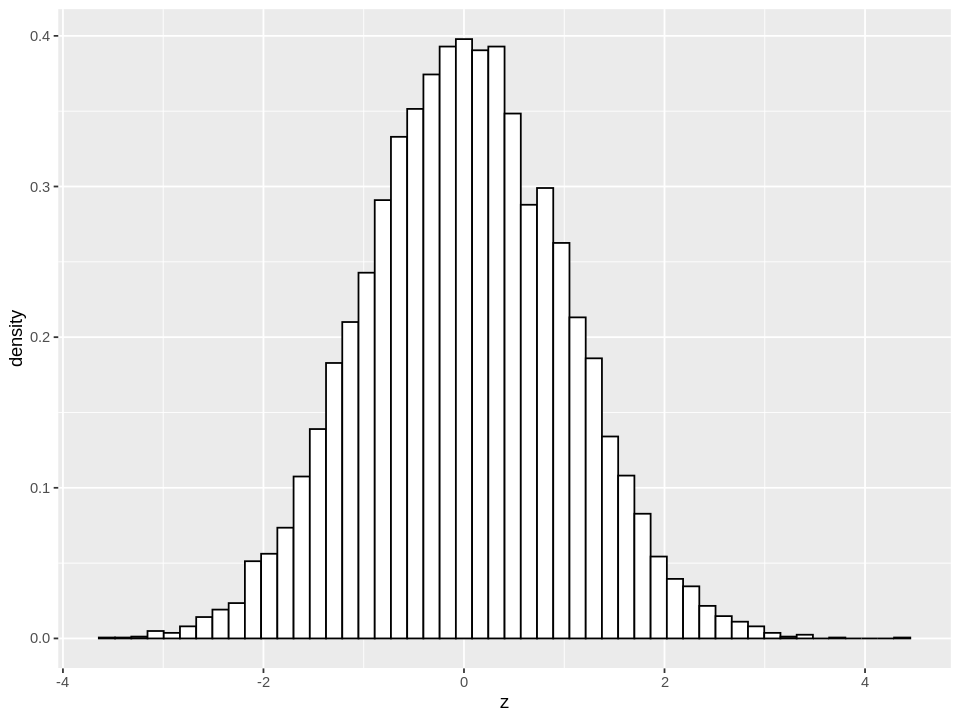

In [99]:
draw_temp_z <- function(z){
ggplot() + geom_histogram(aes(x = z, y = ..density..), bins = 50, fill='white', color='black')
}
draw_temp_z(replicate(10000, sample_z(100)))
draw_temp_z(replicate(10000, sample_z(100)))
draw_temp_z(replicate(10000, sample_z(100)))
# مشابه توزیع نرمال شد

<div dir = "rtl" style="direction:rtl;line-height:250%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
             سوال دوم
        </font>
        <hr/>
    </font>
</div>
<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
        در این سوال می‌خواهیم که تنها به کمک یک عدد رندوم ساز یکنوا(uniform) صحیح، اعداد رندومی که از یک توزیع ریاضی پیروی می‌کنند را بسازیم.
        یک عدد رندوم ساز یکنوا صحیح، تابعی است که خروجی آن یک عدد صحیح در بازه‌ی
        $[0, n)$
        است که احتمال انتخاب شدن هر عدد در آن برابر است.
    <br/>
        <span style="color:red">
        دقت کنید که در این سوال حق استفاده از توابعی همچون qnorm/rexp/runif و غیره را ندارید!
        </span>
    <br/>
        برای شروع، این موضوع را در نظر داشته باشید که الگوریتم‌های تولید اعداد تصادفی 
        <a href="https://en.wikipedia.org/wiki/Pseudorandom_number_generator">(PRNG)</a>
        که در زبان‌های برنامه نویسی استفاده می‌شوند
        صرفا بیت‌های رندوم تولید می‌کنند.
        این بدین معنا است که به عنوان مثال الگورتمی به عنوان خروجی 32بیت به ما می‌دهد که هر بیت به احتمال نیم برابر 1 است و به احتمال نیم برابر 0 است.
        حال دقت کنید که می‌توان این 32 بیت را به عنوان یک عدد صحیح در بازه‌ی
        $[0,2^{32})$
        در نظر گرفت.
        این موضوع نشان می‌دهد که پایه‌ای ترین ابزاری که برای ساخت اعداد تصادفی داریم عملا یک int می‌سازد که بین
        $0$ و
        $2^{32}$
        است و احتمال آمدن هر عدد برابر است (پس توزیع آن uniform است).
        به عنوان مثال Python و R
        از الگوریتم
        <a href="https://en.wikipedia.org/wiki/Mersenne_Twister">Mersenne Twister</a>
        برای ساخت اعداد تصادفی 
        int
        استفاده می‌کند.
     <br/>
        می‌دانیم که برای استفاده از
        inverse transform sampling
        - که در ساختن اعداد تصادفی با توزیع‌های خاص کاربرد دارد -
        باید در ابتدا متغیر تصادفی داشته باشیم که از توزیع یونیفرم بین 0 تا 1 پیروی کند.
        به عبارتی دیگر باید تابعی داشته باشیم که یک عدد رندوم با توزیع یکنوا بین 0 و 1 بسازد.
        روشی که امروزه برای ساخت اعداد اعشاری بین 0 و 1 با توزیع یکنوا استفاده می‌شود بدین صورت است که اگر به عنوان مثال تابعی داشته باشیم که یک عدد رندوم صحیح با توزیع یکنوا
        $[0,n)$
        به ما بدهد، کافی است که آنرا صدا بزنیم و خروجی آنرا تقسیم بر
        $n$
        کنیم. بدین صورت یک عدد تصادفی اعشاری در بازه‌ی
        $[0,1)$
        داریم. 
    <br/>
        برای شروع این سوال، به کمک تابع sample در r،
        تابعی بنویسید که یک عدد تصادفی با توزیع یونیفرم در بازه‌ی
        $[0,1)$
        بدهد. پیشنهاد می‌کنم که بازه‌ی خروجی اعداد sample را
        $[0,2^{23})$
        قرار دهید.
        (چرایی این عدد را در درس ساختار و زبان کامپیوتر پیدا کنید!)
    </font>
</div>

In [1]:
random_01 <- function(){
return(sample(x=0:2^23,size=1)/2^23)
    }

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
        تابعی که نوشتید را به تعداد زیادی صدا بزنید و histogram اعداد برگردانده شده را رسم کنید و نشان دهید که اعداد برگردانده شده، از توزیع یونیفرم بین ۰ و ۱ پیروی می‌کنند.
    </font>
</div>

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


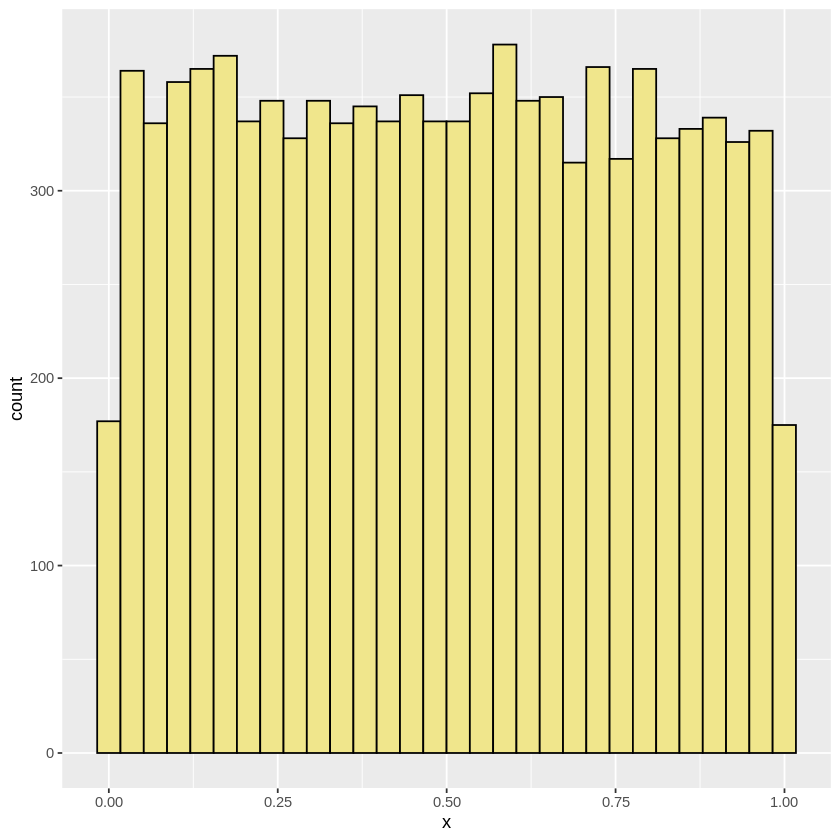

In [6]:
x <- replicate(10000,random_01())
s <- ggplot(data=data.frame(x),aes(x=x))
s + geom_histogram(col="black",fill="khaki")

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
        حال می‌خواهیم که تابعی پیاده سازی کنیم که یک عدد تصادفی با توزیع نمایی را تولید کند. این کار را به کمک inverse transform sampling انجام دهید.
    <br/>
        سپس با رسم نمودار به ازای لاندا‌های مختلف و دلخواه، عملکرد تابع خودتان را با تابع
        rexp
        مقایسه کنید.
    <br/>
        <b>پیشنهاد:</b>
        می‌توانید از 
        geom_density
        استفاده کنید.
    </font>
</div>

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


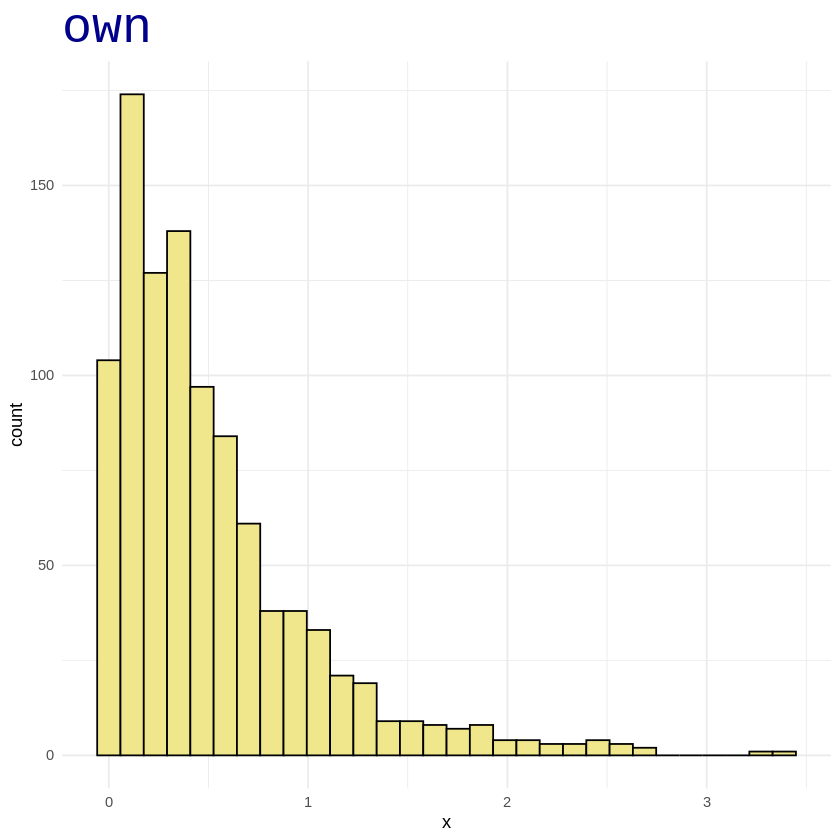

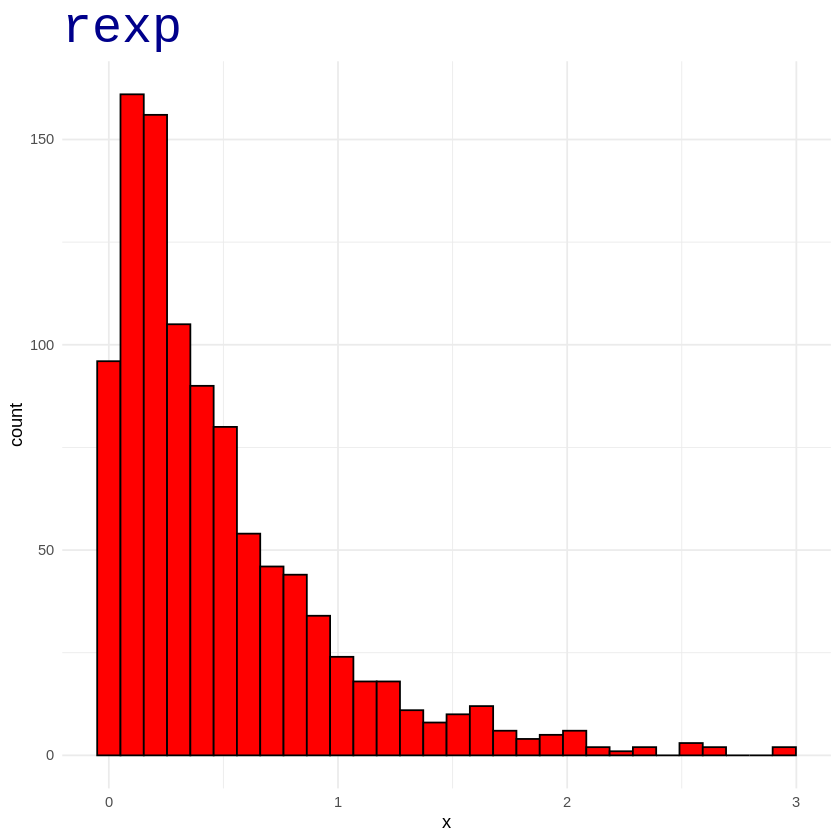

In [ ]:
one_exp <- function(lambda){
    return(-log(1-random_01())/lambda)
}
expOUni <- function(n, lambda){
    x <- rep(0,n)
    for (i in 1:n){
        x[i] <- one_exp(lambda)
    }
    return(x)
}
dif <- function(n,lambda){
  x <- expOUni(n,lambda)
  s <- ggplot(data=data.frame(x),aes(x=x))
  print(s + geom_histogram(col="black",fill="khaki") + theme_minimal() + ggtitle("own")
  +theme(plot.title = element_text(colour = "DarkBlue", size=30, family="Courier")))
  x <- rexp(n=n,rate=lambda)
  s <- ggplot(data=data.frame(x),aes(x=x))
  print(s + geom_histogram(col="black",fill="red") + theme_minimal() + ggtitle("rexp")
  +theme(plot.title = element_text(colour = "DarkBlue", size=30, family="Courier"))) 
}

dif(1000,2)

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
        در قسمت بعدی سوال می‌خواهیم تابعی بنویسیم که اعداد تصادفی با توزیع نرمال را تولید کنید. در ابتدا CDF توزیع نرمال را پیدا می‌کنیم:
        $$
        \frac{1}{2}\left[1 + \operatorname{erf}\left( \frac{x-\mu}{\sigma\sqrt{2}}\right)\right]
        $$
        که در اینجا
        erf
        به صورت زیر تعریف شده است:
        $$
        \operatorname{erf} z = \frac{2}{\sqrt\pi}\int_0^z e^{-t^2}\,dt
        $$
        حساب کردن این تابع کار راحتی نیست چه برسد به حساب کردن معکوس آن! اما تقریب‌هایی برای آن وجود دارند که می‌توان به کمک آنها
        $\operatorname{erf}^{-1}$
        را با دقت نسبتا خوبی حساب کرد. یکی از این توابع در بلاک زیر آمده است.
        <a href="https://people.maths.ox.ac.uk/gilesm/codes/erfinv/gems.pdf">[منبع]</a>
    <br/>
        به کمک این تابع داده شده، تابعی بنویسید که بتوان به کمک آن اعداد تصادفی تولید کرد که از توزیع نرمال با انحراف معیار سیگما و میانگین مو پیروی می‌کند.
    </font>
</div>

In [7]:
erfinv <- function(x) {
    w <- -log((1 - x) * (1 + x))
    if (w < 5.000000) {
        w <- w - 2.500000
        p <- 2.81022636e-08
        p <- 3.43273939e-07 + p * w
        p <- -3.5233877e-06 + p * w
        p <- -4.39150654e-06 + p * w
        p <- 0.00021858087 + p * w
        p <- -0.00125372503 + p * w
        p <- -0.00417768164 + p * w
        p <- 0.246640727 + p * w
        p <- 1.50140941 + p * w
    } else {
        w <- sqrt(w) - 3.000000
        p <- -0.000200214257
        p <- 0.000100950558 + p * w
        p <- 0.00134934322 + p * w
        p <- -0.00367342844 + p * w
        p <- 0.00573950773 + p * w
        p <- -0.0076224613 + p * w
        p <- 0.00943887047 + p * w
        p <- 1.00167406 + p * w
        p <- 2.83297682 + p * w
    }
    return(p * x)
}

In [16]:
Fm1 <- function(x,mu,sd){
  # y = (x-mu)/sd
  return(sqrt(2) * erfinv(2 * x - 1))
}

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
        به کمک نمودار و مقایسه با
        rnorm
        به ازای ورودی‌های مختلف نشان دهید که تابع شما درست کار می‌کند.
    </font>
</div>

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


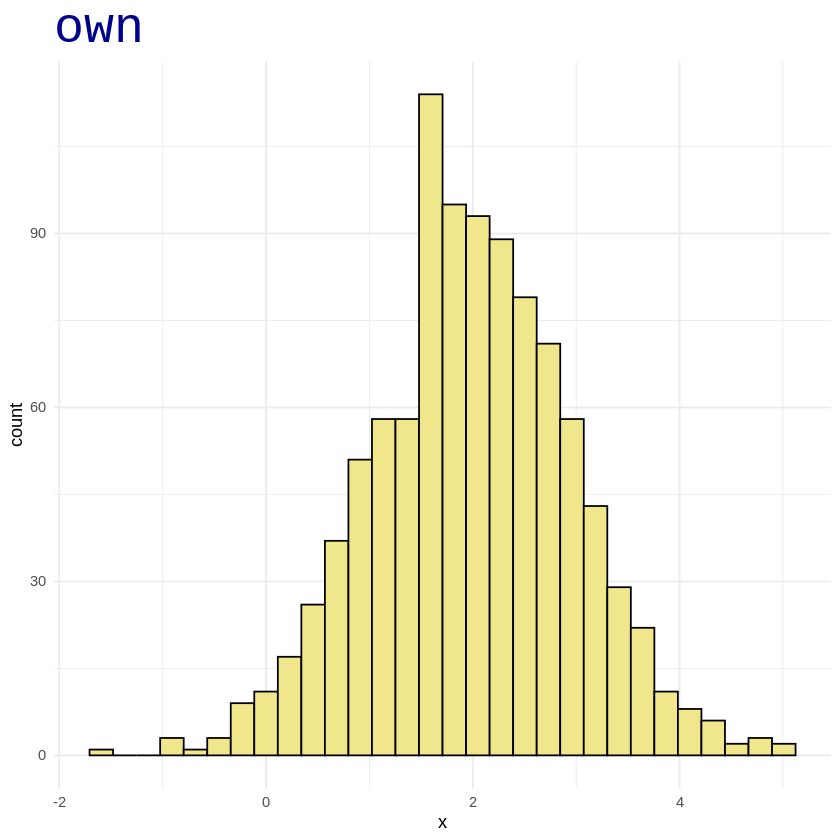

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


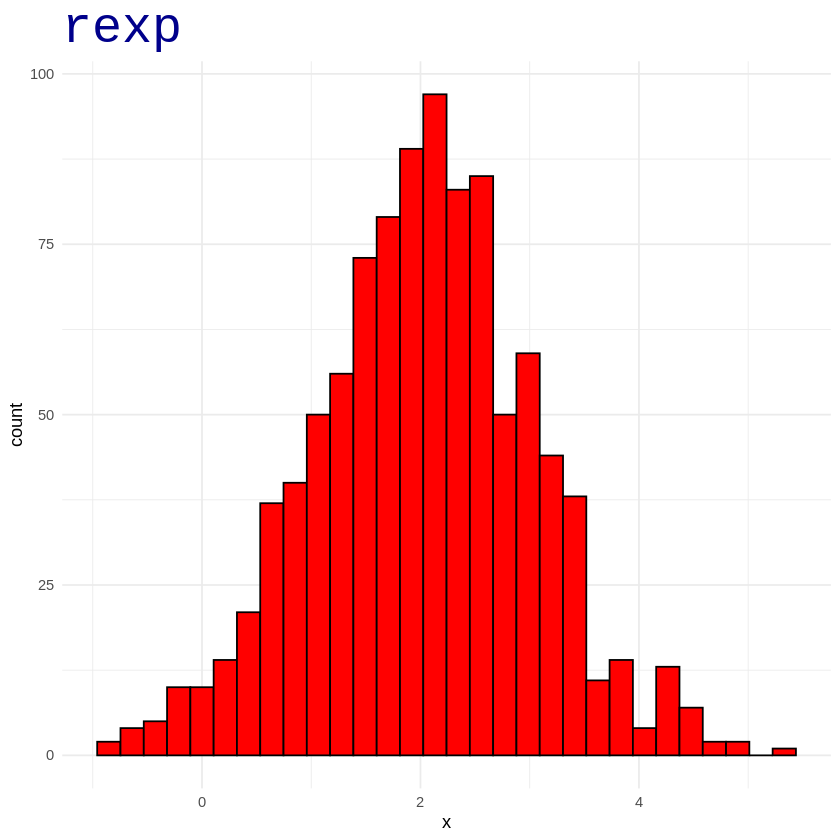

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


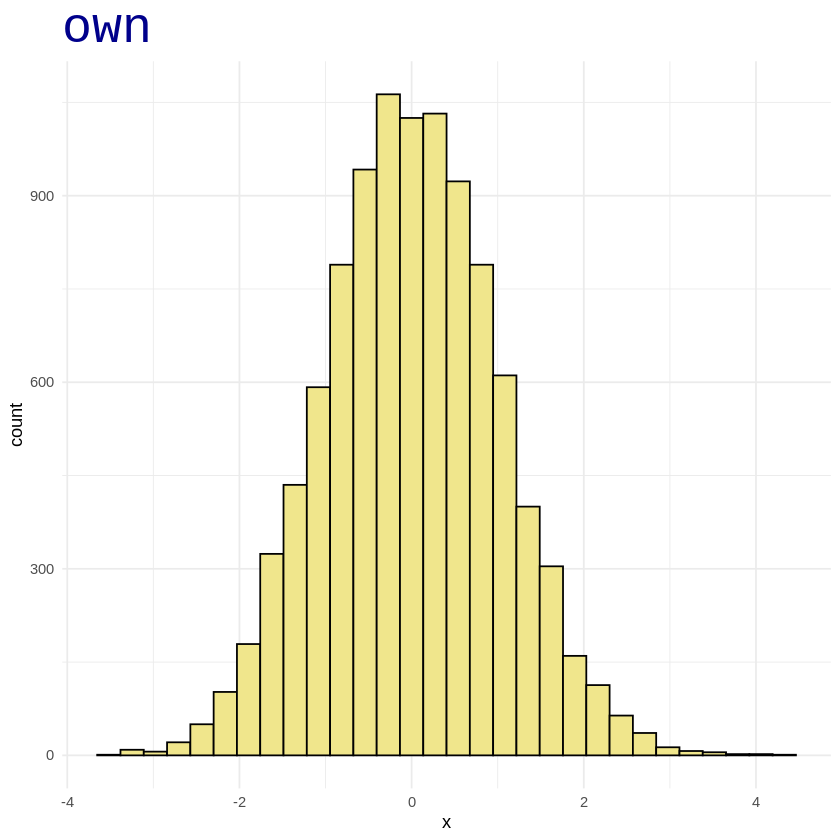

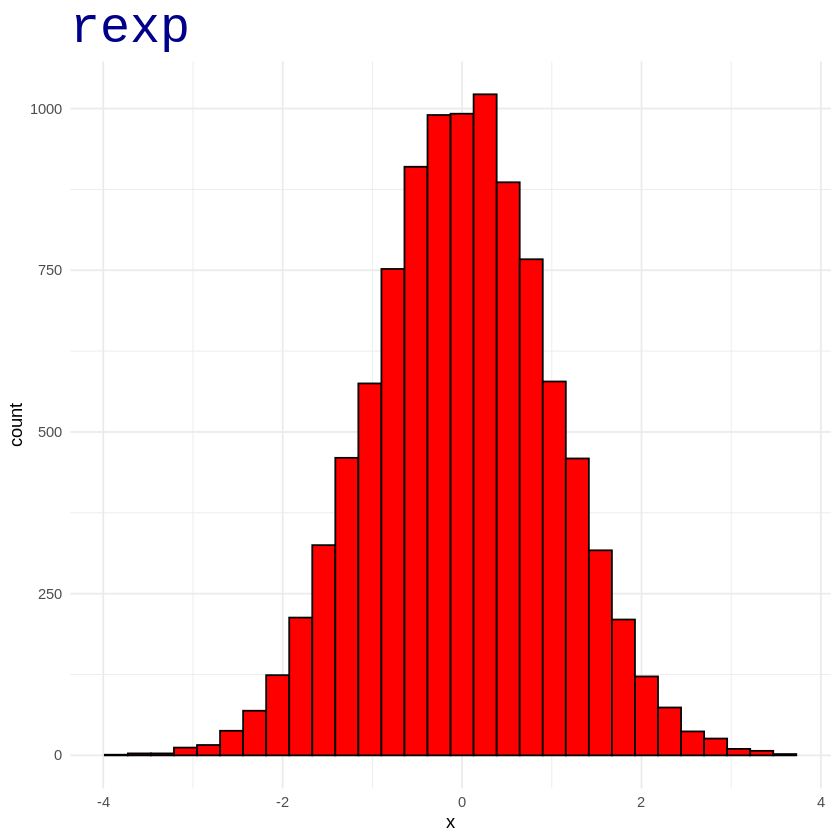

In [21]:
nomUni <- function(n, mu,sd){
    x <- rep(0,n)
    for (i in 1:n){
        x[i] <- Fm1(random_01(),mu,sd) * sd + mu
    }
    return(x)
}
draw_compare_normal <- function(n,mu,sd){
  x <- nomUni(n,mu,sd)
  s <- ggplot(data=data.frame(x),aes(x=x))
  print(s + geom_histogram(col="black",fill="khaki") + theme_minimal() + ggtitle("own")
  +theme(plot.title = element_text(colour = "DarkBlue", size=30, family="Courier")))
  x <- rnorm(n=n,mean=mu,sd=sd)
  s <- ggplot(data=data.frame(x),aes(x=x))
  print(s + geom_histogram(col="black",fill="red") + theme_minimal() + ggtitle("rexp")
  +theme(plot.title = element_text(colour = "DarkBlue", size=30, family="Courier"))) 
}
draw_compare_normal(1000,2,1)
draw_compare_normal(10000,0,1)

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
        در قسمت آخر این سوال می‌خواهیم همین کار‌ها را بر روی یک توزیع دیگر انجام دهیم.
        PDF
        این توزیع به صورت زیر است:
$$\frac{1}{2\sqrt{x}} \operatorname{exp}(-\sqrt{x})$$
        در ابتدا
        CDF
        این تابع را بدست آورید و سپس تابعی بنویسد که اعداد تصادفی با این توزیع تولید کند. در نهایت، نمودار
        PDF
        این تابع را رسم کنید.
        نمودار PDFی
        که در صورت سوال به شما داده شده است را با نموداری که رسم کرده‌اید مقایسه کنید.
    </font>
</div>

$$u = -\sqrt{x} \implies \int \dfrac{e^{-\sqrt{x}}}{2\sqrt{x}} dx = -\int e^u du = -e^u$$
$$\implies = -e^{-\sqrt{x}} \implies F_X(t) = -(e^{-\sqrt{t}}-e^0) = 1-e^{-\sqrt{t}}$$
if $t<=0 \rightarrow$ 0

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message in geom_line(aes(x, y), col = "black", fill = "red"):
“Ignoring unknown parameters: `fill`”


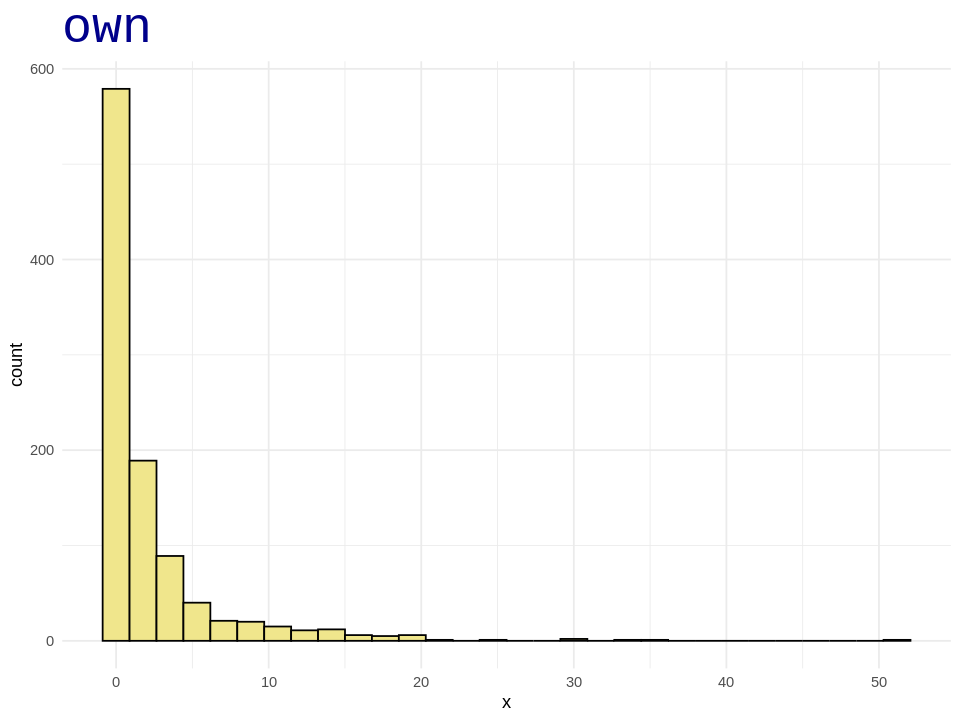

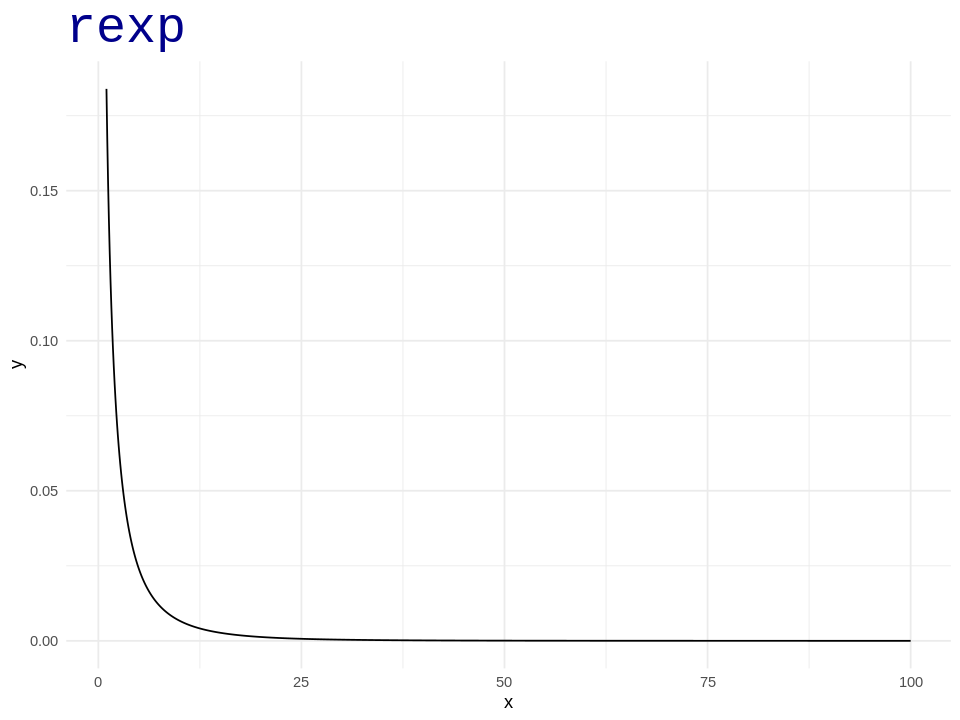

In [84]:
ddUni <- function(x){
  return(log(1-x)^2)
}
ddUniSample <- function(n){
  x <- rep(0,n)
    for (i in 1:n){
        x[i] <- ddUni(random_01())
    }
    return(x)
}
pdfFunc <- function(x){
  if(x <= 0){
    return(0)
  }
  return(1/(2*(sqrt(x))) * exp(-sqrt(x)))
}
pdfSample <- function(n){
  x <- seq(0,n,0.1)
  y <- lapply(x,pdfFunc)
  return(x,y)
}
draw_compare <- function(n){
  x <- ddUniSample(n)
  s <- ggplot(data=data.frame(x),aes(x=x))
  print(s + geom_histogram(col="black",fill="khaki") + theme_minimal() + ggtitle("own")
  +theme(plot.title = element_text(colour = "DarkBlue", size=30, family="Courier")))
  x <- seq(1,100,0.1)
  y <- sapply(x,pdfFunc)
  df <- data.frame(x,y)
  s <- ggplot(data=df)
  print(s + geom_line(aes(x,y),col="black",fill="red") + theme_minimal() + ggtitle("rexp")
  +theme(plot.title = element_text(colour = "DarkBlue", size=30, family="Courier"))) 
}
draw_compare(1000)